# HW 1 Due Jan 21, 12 Noon

In the class we looked at problem 2 (in Chapter 2 of the book Probabilistic Robots be Thrun et al – see attached images) and solved it using a finite state machine model. We also pointed out that solutions for some of the problems in the book exist on the following site

https://github.com/pptacher/probabilistic_robotics

### 2(b)  Write up a general purpose simulator for the state transition matrix

- Given: markov transition table
- Goal: function that given a number of days, produces a series of weather states that obeys the transition table

Steps:
- create a structure representing the transitions between states
- for each day,
    - generate a random number
    - transition to the state given by that number
    - add new state to the list of states



Create Structure representing this transition matrix

|Weather| Sunny | Cloudy | Rainy  |
|-------|-------| -------|--------|
| Sunny | .8    | .2     | 0      |
| Cloudy| .4    | .4     | 0.2    |
| Rainy | .2    | .6     | 0.2    |

In [1]:
import random
random.seed(0);


In [2]:
class Weather(object):
    SUNNY = 0
    CLOUDY = 1
    RAINY = 2
    
    def __init__(self, transitions, start=SUNNY):
        self.transition_matrix = transitions
        self.today = start
    
    def _validate_weather(self, weather):
        """ Raises exception if invalid weather """
        if weather not in [self.SUNNY, self.CLOUDY, self.RAINY]:
            raise Exception("Invalid argument!")
    def get_transition_matrix(self):
        """Getter"""
        return np.array(self.transition_matrix)
    def set_today(self, weather):
        """Sets today's weather"""
        self._validate_weather(weather)
            
        self.today = weather

    def get_probability(self, today, tomorrow):
        """Returns the probability of the given transition"""
        self._validate_weather(today)
        self._validate_weather(tomorrow)
        
        return self.transition_matrix[today][tomorrow]

    def get_tomorrows_options(self, today):
        self._validate_weather(today)
        return np.array(self.transition_matrix[today])
        
    def next_day(self):
        """Returns Tomorrow's weather given today's weather based
        on the probabilities"""
        r = random.random() # Number from [0.0, 1.0)
        transitions = transition_matrix[self.today]
        
        # See if tomorrow is SUNNY
        prob = transitions[self.SUNNY]
        if r < prob:
            return self.SUNNY
        
        # See if tomorrow is CLOUDY
        prob += transitions[self.CLOUDY]
        if r < prob:
            return self.CLOUDY
        
        # Tomorrow must be RAINY
        return self.RAINY
    
    def get_sequence(self, num_days = 10):
        """Return a sequence of weathers based on the transition matrix"""
        sequence = [self.today]

        for i in range(num_days - 1):
            tomorrow = self.next_day()
            sequence.append(tomorrow)

            self.set_today(tomorrow)

        return sequence


In [3]:
transition_matrix = [
    [.8, .2, 0],
    [.4, .4, .2],
    [.2, .6, .2]
]

weather_transitions = Weather(transition_matrix)


In [4]:
num_runs = 100
sequence = weather_transitions.get_sequence(num_runs);
    
print(sequence)
    

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0]


### (c) Use your simulator to determine the stationary distribution of this Markov chain. In particular I would like everyone to address 
1. How you initialize the simulation 
2. How many transitions you consider before taking a result and 
3. How many simulation runs you conducted to arrive at the statistics for the stationary distribution.

NOTE: The answer for the stationary distribution is already available in the solutions (link above) but I would like you think about how fast you can converge on the results  

In [5]:
# We need matplotlib to plot the distributions
import matplotlib.pyplot as plt
import numpy as np

Create this helper function to plot a sequence. 

We care about
1. Number of Runs
2. Percent of each weather w.r.t. all days

In [6]:
def sequence_to_pecents(sequence):
    """Calculates a dict with the percent of each weather"""
    results = {
        "sunny": sequence.count(Weather.SUNNY)/len(sequence),
        "cloudy": sequence.count(Weather.CLOUDY)/len(sequence),
        "rainy": sequence.count(Weather.RAINY)/len(sequence)
    }
    return results

def plot_distribution(results):
    """Plots a histogram of how many times each day occurs""" 

    names = list(results.keys())
    values = list(results.values())

    ax = plt.bar(names, values)
    plt.title("Number of Days of a Given Weather for {} Days".format(len(sequence)))
    plt.xlabel("Weather")
    plt.ylabel("Percentage")
    
    labels = values
    
    rects = ax.patches
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom')
    return results

Given that function, lets see how the distribution changes as the number of days increases. 

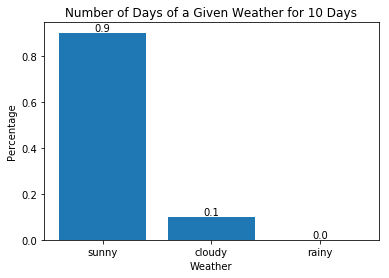

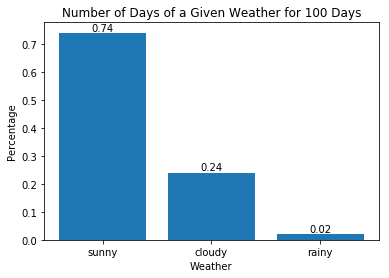

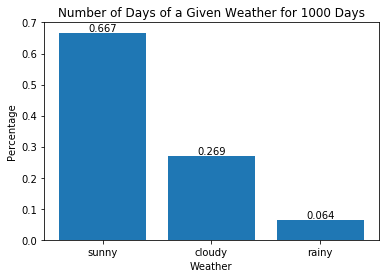

In [7]:
num_days = [pow(10, x) for x in range(1, 4)] # Each run is an order of magnitude more in num days

for iteration, seq_len in enumerate(num_days):
    # Generate the sequence
    sequence = weather_transitions.get_sequence(seq_len) 
    # Get the percentage of each
    percent = sequence_to_pecents(sequence) 
    
    plt.figure(iteration)
    plot_distribution(percent)

    # Reset the transitions
    weather_transitions.set_today(Weather.SUNNY)

More useful than the distribution at each number of days is a plot of how the distribution changes as the number of days increases

In [8]:
# Generate the data we need to use.
num_days = range(10, 10000, 100)
results = {}

for seq_len in num_days:
    # Generate the sequence
    sequence = weather_transitions.get_sequence(seq_len) 
    # Get the percentage of each
    percent = sequence_to_pecents(sequence) 
    
    results[seq_len] = percent
    
    # Reset the transitions
    weather_transitions.set_today(Weather.SUNNY)


## Results is a dictionary
- key = number of days, 
- value = the distribution 

## Distribution
- key: one of ['sunny', 'cloudy', 'rainy']
- value: a float representing the percentage

<Figure size 432x288 with 0 Axes>

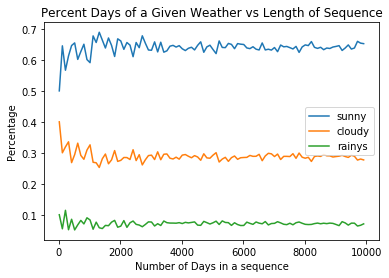

In [9]:
powers = results.keys() # X Axis
distributions = results.values()

# Y Axes
sunnys = [percent['sunny'] for percent in distributions]
cloudys = [percent['cloudy'] for percent in distributions]
rainys = [percent['rainy'] for percent in distributions]

# Make the Figure
plt.figure()
fig, ax = plt.subplots()
ax.plot(powers, sunnys, label="sunny")
ax.plot(powers, cloudys, label="cloudy")
ax.plot(powers, rainys, label="rainys")
ax.legend()
plt.title("Percent Days of a Given Weather vs Length of Sequence")
plt.xlabel("Number of Days in a sequence")
plt.ylabel("Percentage")
plt.show()

From this graph, we can see the distribution of days eventually converges. To get a general idea of what the overall distribution is, we can take the average of all of our runs.

In [10]:
# Print the results
print("Average sunny days: {}".format(np.mean(sunnys)))
print("Average cloudy days: {}".format(np.mean(cloudys)))
print("Average rainy days: {}".format(np.mean(rainys)))

Average sunny days: 0.6396823670787023
Average cloudy days: 0.28865945670756404
Average rainy days: 0.0716581762137337


Experimentally, we should continue increasing the number of iterations we take the sample over until the average 
percent of days doesn't change to an realistic amount. 

### (d) The solution is derived via a closed analytical form. Can you do the diagonalization of the state matrix A with python to come up with the same result.

The stationary distribution of a Markov chain is a distribution that remains unchanged when the transition vector is applied to it. [1]

As described by [1], the following equation holds. 

\begin{equation*}
\pi=P\pi
\end{equation*}

where $\pi$ represents the probability distribution and $P$ represents the transition matrix. 

This equation is of the form
\begin{equation*}
\lambda v = Mv 
\end{equation*}

where $\lambda=1$. 

The main difference between the equations is that $P$ is a row vector: each row of the matrix represents a collection of data (summing to 1) while $M$ is grouped by columns. By transposing the stationary distribution matrices, we can align the problem more closely. 

The following properties of matrices allow us to rearrange the equation appropriately. 
\begin{equation*}
(AB)^{T} = B^{T}A^{T}
\end{equation*}

Therefore, the stationary distribution can be arranged as follows:
\begin{equation*}
(\pi P)^{T} = P^{T}\pi^{T}
\end{equation*}

where $\pi$ starts as a 1x3 row vector and is turned into a 3x1 colun vector. $P$ starts as a 3x3 row matrix and turns into a 3x3 column matrix. 

**Equivalencies**

$M = P^{T}$

$v = \pi^{T}$

$\lambda = 1$

In [11]:
P = weather_transitions.get_transition_matrix()

P_trans = np.matrix.transpose(np.array(P))

**Finding the Stationary Distribution**

Since the above equations are equivalent, the stationary distribution of the matrix $P$ is the eigenvector of $P$ with an eigenvalue of 1. 

[1]: https://brilliant.org/wiki/stationary-distributions/

In [12]:
(val, vec) = np.linalg.eig(P_trans)

print("P: " + str(P))
print("Eigenvalues: " + str(val))
print("Eigenvectors: \n" + str(vec))

P: [[0.8 0.2 0. ]
 [0.4 0.4 0.2]
 [0.2 0.6 0.2]]
Eigenvalues: [ 1.          0.48284271 -0.08284271]
Eigenvectors: 
[[-0.90913729  0.81251992  0.23258782]
 [-0.40406102 -0.47596315 -0.79410449]
 [-0.10101525 -0.33655677  0.56151667]]


Here its important to remember we previously transposed the matrix to column vectors. 
So the vectors we're interested in are in the eigenvector column corresponding to the eigenvalue of 1. 

In [13]:
eyevec = np.matrix.transpose(vec)[0]
print("Eigenvector: \n" + str(eyevec))

Eigenvector: 
[-0.90913729 -0.40406102 -0.10101525]


Now that we have the eigen vector corresponding to 1, normalize by the sum of the vector. 

In [14]:
#Normalize by the minimum
#eyevec = np.divide(eyevec, np.amin(eyevec))
#print()

eyevec = np.divide(eyevec, np.sum(eyevec))
print("Normalized vector: " + str(eyevec))

Normalized vector: [0.64285714 0.28571429 0.07142857]


According to the corresponding normalized eigen vector, the stationary distribution is 
`[0.64285714 0.28571429 0.07142857]`

This matches up to both the book solution AND the experimentally determined solution

**Book Solution**

In [15]:
sol = [9/14, 2/7, 1/14]
print(sol)

[0.6428571428571429, 0.2857142857142857, 0.07142857142857142]


# 3. This is similar to the example we did in class - dog’s location with a noisy sensor.

In [16]:
class NoisySensor(object):
    SUNNY = 0
    CLOUDY = 1
    RAINY = 2
    
    def __init__(self, noise_model):
        # In the model, reach row represents the true weather, 
        # each column represents the observed weather. 
        self.model = np.array(noise_model)
    
    def _validate_weather(self, weather):
        """ Raises exception if invalid weather """
        if weather not in [self.SUNNY, self.CLOUDY, self.RAINY]:
            raise Exception("Invalid argument!")

    def likelihood(self, state):
        """Returns the likelihood the given weather 
        is the true weather given our noise model"""
        self._validate_weather(state)
        
        return self.model[:, state]
        
def plot_pdf(pdf, title=None):
    state = ["sunny", "cloudy", "rainy"]
    plt.bar(state, pdf)
    plt.xlabel("State")
    plt.ylabel("Probability")
    
    if title:
        plt.title(title)
    else:
        plt.title("Probability of Weather")



def normalize(reading):
    return reading/sum(reading)

def update(likelihood, prior):
    return normalize(likelihood * prior)
        
        
        


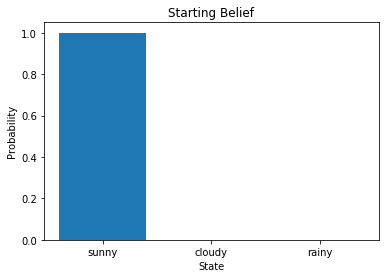

In [17]:
noisy_model = [
    [.6, .4, 0],
    [.3, .7, 0],
    [0, 0, 1]
]

intial = NoisySensor.SUNNY
sensor = NoisySensor(noisy_model)
states = [NoisySensor.SUNNY, \
         NoisySensor.CLOUDY, \
         NoisySensor.RAINY]

observations = np.array(
[NoisySensor.CLOUDY, \
 NoisySensor.CLOUDY, \
 NoisySensor.RAINY, \
 NoisySensor.SUNNY])
 
# Given
belief = [1, 0, 0]

plot_pdf(belief, "Starting Belief")

Based on the problem formulation, we know for a fact today is sunny. Therefore, our initial 
condition is `[1, 0, 0]`. From problem 2, we can simulate tomorrow's weather given today's. 
This transition matrix serves as the "dx" function, turning our belief into a prediction. 

Our prediction for tomorrow's weather is the **prior** used in the update step. 

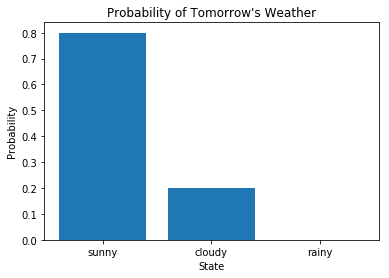

In [18]:
# Apply (dx) transition -> now uncertainty of the actual state
dx = weather_transitions.get_transition_matrix()
dx = np.transpose(dx)
prior = np.matmul(dx, np.array(belief))
plot_pdf(prior, "Probability of Tomorrow's Weather")

Given the prior and our sensor noise model, we can can estimate the probability 
today is cloudy given that we measured it to be. 

[0.69565217 0.30434783 0.        ]


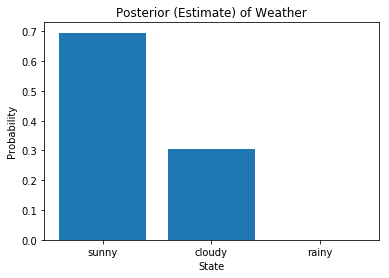

In [19]:
posterior = update(sensor.likelihood(sensor.CLOUDY), prior)
plot_pdf(posterior, "Posterior (Estimate) of Weather")
print(posterior)

This estimate is then used  again as the belief on which we apply our transition matrix for the next round of estimates!

In [20]:
T = weather_transitions.get_transition_matrix()

Day 1. Observation: none Estimate: [1, 0, 0]

Prior: [0.8 0.2 0. ]
Day 2. Observation: 1 Estimate: [0.69565217 0.30434783 0.        ]

Prior: [0.67826087 0.26086957 0.06086957]
Day 3. Observation: 1 Estimate: [0.59770115 0.40229885 0.        ]

Prior: [0.63908046 0.28045977 0.08045977]
Day 4. Observation: 2 Estimate: [0. 0. 1.]

Prior: [0.2 0.6 0.2]
Day 5. Observation: 0 Estimate: [0.4 0.6 0. ]

[0.4 0.6 0. ]


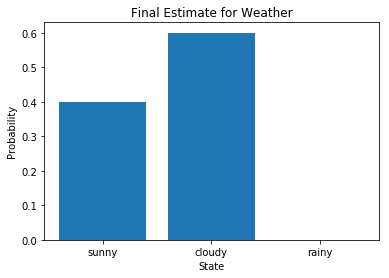

In [21]:
### Reset system here so we can run it all at once...
estimate = [1, 0, 0]
counter = 2
print("Day {}. Observation: {} Estimate: {}".format(1, "none", estimate))
print()

for observation in observations:
    prior = np.matmul(estimate, T)
    print("Prior: " + str(prior))
    
    #posterior = update(likelihood, prior)
    posterior = update(sensor.likelihood(observation), prior)
    
    #print("Day {}. Observation: {} Prior: {}".format(counter, observation, prior))
    #print(sensor.likelihood(observation))
    #
    estimate = posterior
    print("Day {}. Observation: {} Estimate: {}".format(counter, observation, estimate))
    print()
    counter+=1
    #estimate = np.matmul(estimate, np.transpose(T))
    #estimate = normalize(estimate)



print(normalize(estimate))
plot_pdf(estimate, "Final Estimate for Weather")

## Given sunny, sunny, rainy, what is the most likely weather on each day. 
For each of the days, what is the most likley observation

In [22]:
# Given
p3b_observations = np.array(
[NoisySensor.SUNNY, \
 NoisySensor.SUNNY, \
 NoisySensor.RAINY])
 

estimate = [1, 0, 0]
counter = 2
print("Day {}. Observation: {} Estimate: {}".format(1, "none", estimate))
print()

Day 1. Observation: none Estimate: [1, 0, 0]



Prior: [0.8 0.2 0. ]
Day 2. Observation: 0 Estimate: [0.88888889 0.11111111 0.        ]

Prior: [0.75555556 0.22222222 0.02222222]
Day 3. Observation: 0 Estimate: [0.87179487 0.12820513 0.        ]

Prior: [0.74871795 0.22564103 0.02564103]
Day 4. Observation: 2 Estimate: [0. 0. 1.]



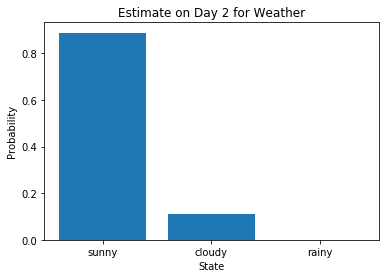

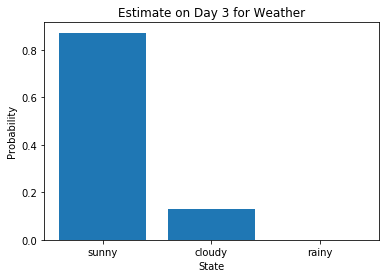

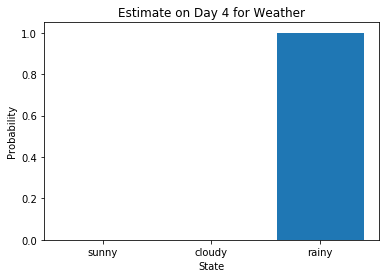

In [23]:
### Reset system here so we can run it all at once...
forward_weather_probabilities=[[1, 0, 0]]


for observation in p3b_observations:
    prior = np.matmul(estimate, T)
    print("Prior: " + str(prior))
    
    #posterior = update(likelihood, prior)
    posterior = update(sensor.likelihood(observation), prior)
    
    #print("Day {}. Observation: {} Prior: {}".format(counter, observation, prior))
    #print(sensor.likelihood(observation))
    #
    estimate = posterior
    forward_weather_probabilities.append(estimate)
    print("Day {}. Observation: {} Estimate: {}".format(counter, observation, estimate))
    print()
    plt.figure()
    plot_pdf(estimate, "Estimate on Day {} for Weather".format(counter))
    counter+=1



## Now we are asked to use information regarding future measurements to help determine today's measurements. 


The forward propagation of information was computed as follows. 

\begin{equation}
posterior_{forward} = p_{measurement} * p_{prior}
\end{equation}

\begin{equation}
p_{prior} = transition\_matrix * belief
\end{equation}

Now, we want to incorporate the information given by future weather measurments into today's measurements. 
In other words, use the measurements from $z[t+1:end]$ to improve posterior estimate $\bar{X}$ at time $t$

\begin{equation}
posterior = p_{today\_given\_future} * posterior_{forward}
\end{equation}

\begin{equation}
p_{today\_given\_future} = p(X | Z_{t+1:end})
\end{equation}



This process is essentially the reverse of the process we used to calculate 
the posteriors moving forward except now we're trying to calculate the posteriors 
in reverse. Now we're starting with a posterior and attempting to work our way
backwards to a prior. On the final day, we know for certain that it rained as a
result of the rainy measurement. Taking that as a given for the posterior, we can
then calculate the probability of yesterday's weather given the transition from
yesterday to today. 

Lets compute the probabilities of transitioning from today to yesterday. We
do this by finding the transpose of the original transition matrix and normalizing 
it by row. Now, each row represents the probability of transitioning to yesterday's 
weather, given today's weather. 

In [24]:
print("T: \n" + str(T))
t_yesterday = np.transpose(T)
print()
print(t_yesterday)

row_sums = t_yesterday.sum(axis=1)
t_yesterday = t_yesterday / row_sums[:, np.newaxis]

print()
print("t_yesterday: \n" + str(t_yesterday))

T: 
[[0.8 0.2 0. ]
 [0.4 0.4 0.2]
 [0.2 0.6 0.2]]

[[0.8 0.4 0.2]
 [0.2 0.4 0.6]
 [0.  0.2 0.2]]

t_yesterday: 
[[0.57142857 0.28571429 0.14285714]
 [0.16666667 0.33333333 0.5       ]
 [0.         0.5        0.5       ]]


For example, `t_yesterday[SUNNY, SUNNY]` represents the probability that yesterday 
was sunny, GIVEN that today is sunny. 

Given this value, we propogate the posterior of day 4 to a probability of day 3's weather. 
We also incorporate the likelihood measurements from the sensor of that day in the back
propogation. As we continue to search further and further back, we can continue estimating the 
state of a particular day off of the future measurements and reverse transition matrix. 

By the end of the observations, we're left with a collection of probabilities, starting at 
the final measurement and working back to the initial. 

Prior: [0.  0.5 0.5]
Probability of  4. Observation: 2 Estimate: [0.  0.5 0.5]

Prior: [0.16666667 0.33333333 0.5       ]
Probability of  3. Observation: 0 Estimate: [0.16666667 0.33333333 0.5       ]

Prior: [0.36904762 0.30952381 0.32142857]
Probability of  2. Observation: 0 Estimate: [0.36904762 0.30952381 0.32142857]



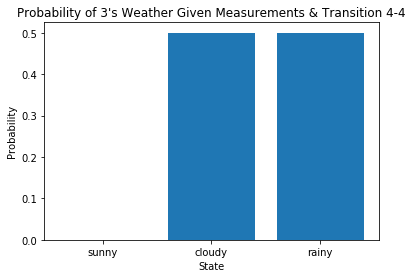

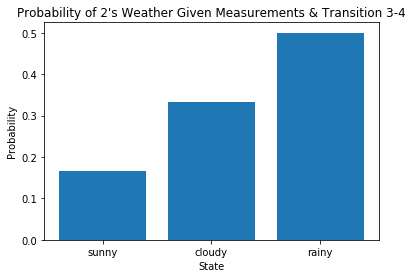

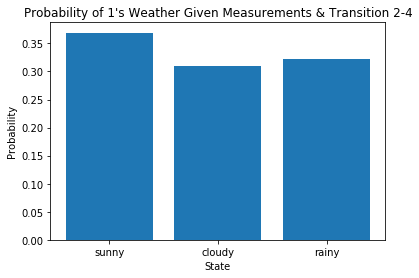

In [25]:
### Reset system here so we can run it all at once...
posterior = [0, 0, 1] # Determined b/c we know its raining 
counter = len(p3b_observations) + 1
#plot_pdf(posterior, "Probability of {}'s Weather Given Measurements {}-{}".format(counter, counter, len(p3b_observations) + 1))

future_weather_probabilities = []
future_weather_probabilities.append([0, 0, 1])

for observation in p3b_observations[::-1]:
    
    prior = normalize(posterior * sensor.likelihood(observation))

    #plt.figure()
    #plot_pdf(prior, "Probability of {}'s Weather Given Measurements {}-{}".format(counter-1, counter, len(p3b_observations) + 1))

    prior = np.matmul(prior, t_yesterday)
    
    print("Prior: " + str(prior))
    
    posterior = prior
    future_weather_probabilities.append(posterior)
    print("Probability of  {}. Observation: {} Estimate: {}".format(counter, observation, posterior))
    print()
    plt.figure()
    plot_pdf(posterior, "Probability of {}'s Weather Given Measurements & Transition {}-{}".format(counter-1, counter, len(p3b_observations) + 1))
    counter-=1

# Reverse the order so it lines up with the forward propagation
# [0] = day3, [2] = day 1 => # [0] = day1, [2] = day 3
future_weather_probabilities = future_weather_probabilities[::-1]

After we collect these values, we can use them to scale our belief from the forward propagations. 
To do this, we need to collect the probabilities based on the forward AND backward propogations of
sensor information. For each day, we should have a corresponding series of measurements; i.e. the lists 
should be of the same length

In [26]:
def print_probs(title, forward, backward, combined):
    print(title)
    print("Forward Prop: {}".format(str(forward)))
    print("Backward Prop: {}".format(str(backward)))
    print("Combined Prop: {}".format(str(combined)))
    print()

In [27]:
# Just make sure we have the right sizes here
assert(len(future_weather_probabilities) == len(forward_weather_probabilities))

Based on our equations, the can combine the backward propogations and backward propogations by multiplying the probabilities of each series together and normalizing. 



Posteriors for day 1
Forward Prop: [1, 0, 0]
Backward Prop: [0.36904762 0.30952381 0.32142857]
Combined Prop: [1. 0. 0.]

Posteriors for day 2
Forward Prop: [0.88888889 0.11111111 0.        ]
Backward Prop: [0.16666667 0.33333333 0.5       ]
Combined Prop: [0.8 0.2 0. ]

Posteriors for day 3
Forward Prop: [0.87179487 0.12820513 0.        ]
Backward Prop: [0.  0.5 0.5]
Combined Prop: [0. 1. 0.]

Posteriors for day 4
Forward Prop: [0. 0. 1.]
Backward Prop: [0, 0, 1]
Combined Prop: [0. 0. 1.]



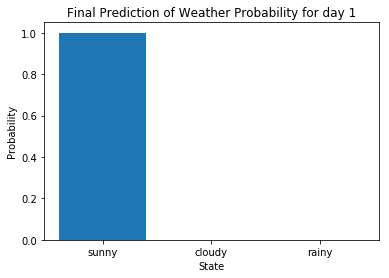

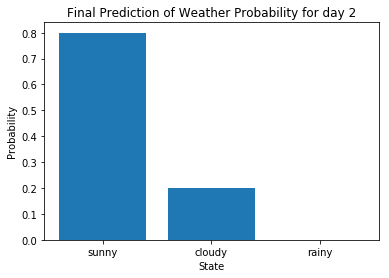

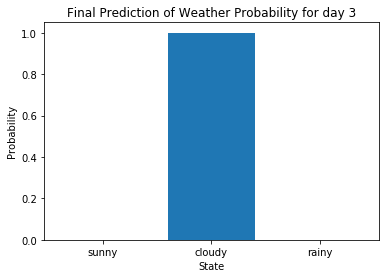

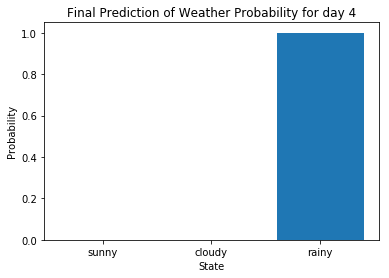

In [28]:
final_predications = []
for i in range(0, len(forward_weather_probabilities)):
    final_predications.append(normalize(forward_weather_probabilities[i]* future_weather_probabilities[i]))

    descr = "Posteriors for day {}".format(i + 1)
    print_probs(descr, forward_weather_probabilities[i], future_weather_probabilities[i], final_predications[i])
    plt.figure()
    plot_pdf(final_predications[i], "Final Prediction of Weather Probability for day {}".format(i + 1))



Given this sequence, the most likely transitions sequence is S->S->C->R. 

The probability of this is .8. 

The alternative option is S->C->C->R which will occur with a probability of .2